# Description

File used: [korean house data](./Data/Korean_house_data/Daegu_Real_Estate_data.csv)

# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,LabelBinarizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate, cross_val_predict, cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from types import SimpleNamespace

# Load data

In [3]:
dataFilePath = './Data/Korean_house_data/Daegu_Real_Estate_data.csv'
originalDataset = pd.read_csv(dataFilePath)
originalDataset

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
0,141592,2006,2007,8,814,3,terraced,individual_heating,management_in_trust,111.0,...,1.0,1.0,0.0,3.0,2.0,2.0,2.0,5,6.0,9.0
1,51327,1985,2007,8,587,8,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
2,48672,1985,2007,8,587,6,corridor,individual_heating,self_management,80.0,...,1.0,2.0,1.0,2.0,1.0,1.0,0.0,3,12.0,4.0
3,380530,2006,2007,8,2056,8,terraced,individual_heating,management_in_trust,249.0,...,1.0,0.0,0.0,2.0,2.0,1.0,2.0,5,3.0,7.0
4,221238,1993,2007,8,1761,3,mixed,individual_heating,management_in_trust,523.0,...,1.0,5.0,0.0,4.0,3.0,5.0,5.0,4,14.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5886,511504,2007,2017,8,1643,19,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5887,298230,2006,2017,8,903,13,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
5888,357522,2007,2017,8,868,20,terraced,individual_heating,management_in_trust,0.0,...,1.0,0.0,2.0,3.0,3.0,2.0,2.0,10,9.0,10.0
5889,312389,1978,2017,8,1327,1,corridor,individual_heating,self_management,87.0,...,1.0,0.0,0.0,3.0,3.0,3.0,2.0,3,7.0,11.0


# Dataset stats

In [5]:
originalDataset.shape

(5891, 30)

In [6]:
originalDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5891 entries, 0 to 5890
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5891 non-null   int64  
 1   YearBuilt                           5891 non-null   int64  
 2   YrSold                              5891 non-null   int64  
 3   MonthSold                           5891 non-null   int64  
 4   Size(sqf)                           5891 non-null   int64  
 5   Floor                               5891 non-null   int64  
 6   HallwayType                         5891 non-null   object 
 7   HeatingType                         5891 non-null   object 
 8   AptManageType                       5891 non-null   object 
 9   N_Parkinglot(Ground)                5891 non-null   float64
 10  N_Parkinglot(Basement)              5891 non-null   float64
 11  TimeToBusStop                       5891 no

In [7]:
originalDataset.isnull().sum()

SalePrice                             0
YearBuilt                             0
YrSold                                0
MonthSold                             0
Size(sqf)                             0
Floor                                 0
HallwayType                           0
HeatingType                           0
AptManageType                         0
N_Parkinglot(Ground)                  0
N_Parkinglot(Basement)                0
TimeToBusStop                         0
TimeToSubway                          0
N_APT                                 0
N_manager                             0
N_elevators                           0
SubwayStation                         0
N_FacilitiesNearBy(PublicOffice)      0
N_FacilitiesNearBy(Hospital)          0
N_FacilitiesNearBy(Dpartmentstore)    0
N_FacilitiesNearBy(Mall)              0
N_FacilitiesNearBy(ETC)               0
N_FacilitiesNearBy(Park)              0
N_SchoolNearBy(Elementary)            0
N_SchoolNearBy(Middle)                0


In [8]:
originalDataset.duplicated(keep='first').sum()

316

In [10]:
originalDataset[originalDataset.duplicated(keep='first')]

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,HallwayType,HeatingType,AptManageType,N_Parkinglot(Ground),...,N_FacilitiesNearBy(Mall),N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total)
68,348672,2007,2007,11,1483,3,terraced,individual_heating,management_in_trust,7.0,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,5,9.0,5.0
76,360176,2007,2007,11,1483,4,terraced,individual_heating,management_in_trust,7.0,...,1.0,0.0,1.0,2.0,1.0,1.0,1.0,5,9.0,5.0
176,176106,2006,2008,2,903,1,terraced,individual_heating,management_in_trust,123.0,...,1.0,2.0,0.0,4.0,3.0,3.0,1.0,4,8.0,11.0
280,291238,2007,2008,5,1394,11,terraced,individual_heating,management_in_trust,554.0,...,2.0,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0
427,286902,2007,2008,10,1394,9,terraced,individual_heating,management_in_trust,554.0,...,2.0,0.0,1.0,2.0,2.0,2.0,2.0,4,9.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4772,144752,2013,2016,1,644,6,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4773,149274,2013,2016,1,644,16,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4774,143238,2013,2016,1,644,2,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0
4775,149274,2013,2016,1,644,17,terraced,individual_heating,management_in_trust,8.0,...,1.0,0.0,1.0,4.0,2.0,2.0,3.0,7,9.0,11.0


C:\Users\Lazar\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\plotting\_matplotlib\tools.py:218: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


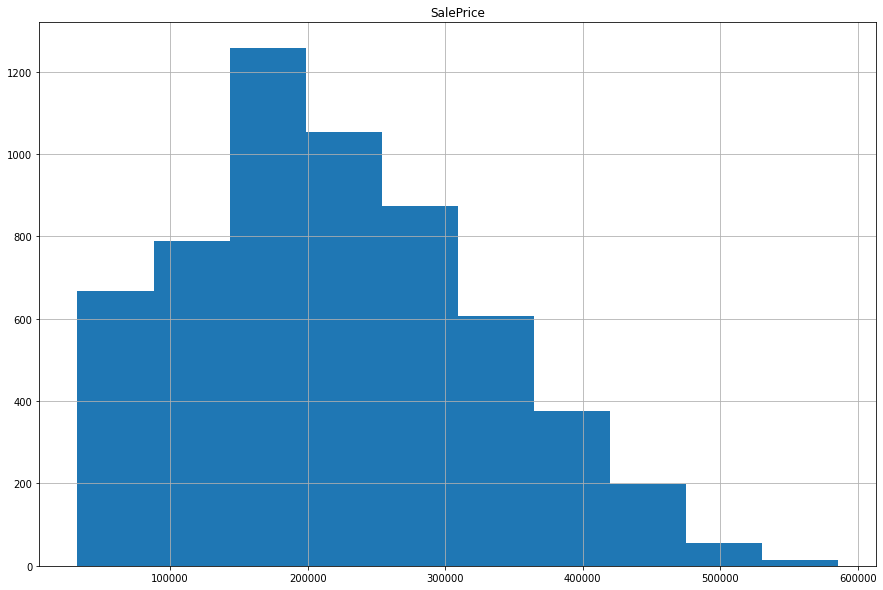

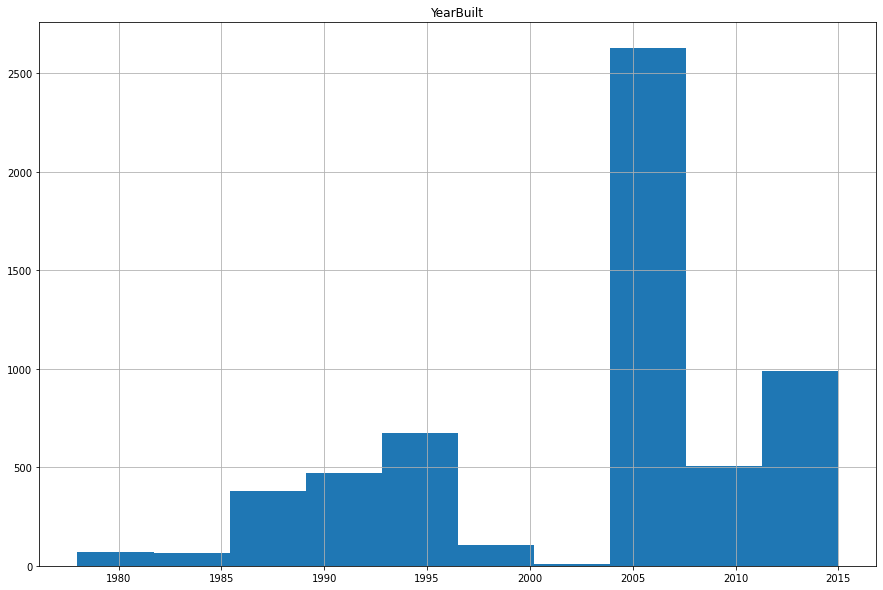

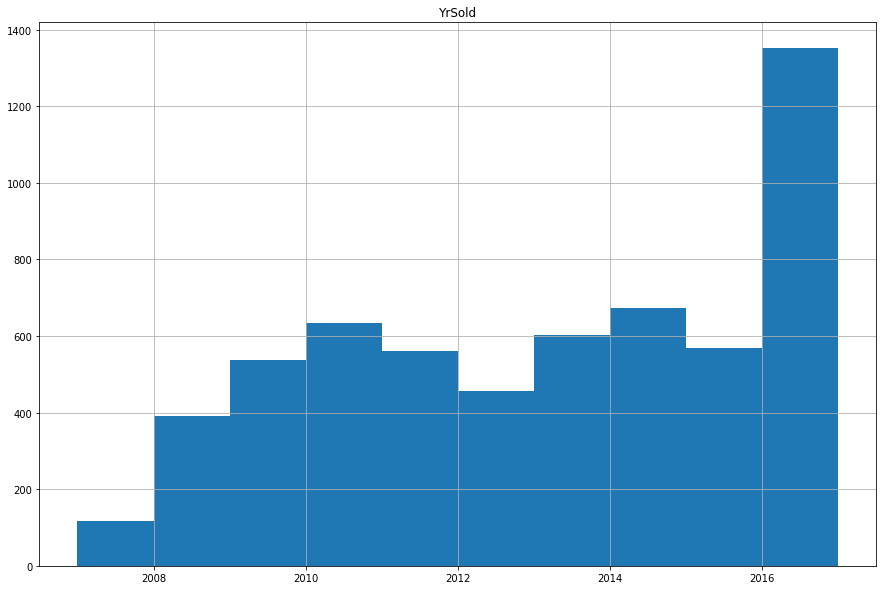

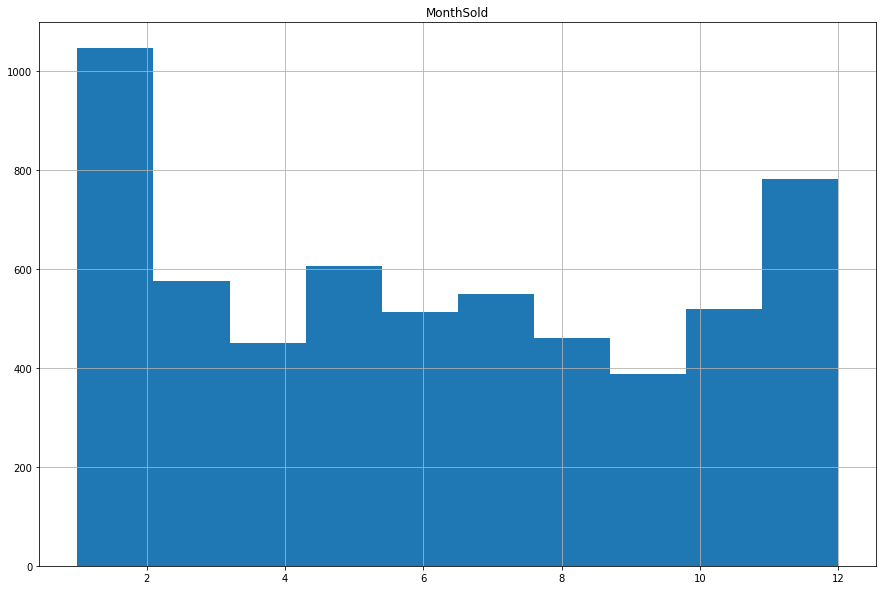

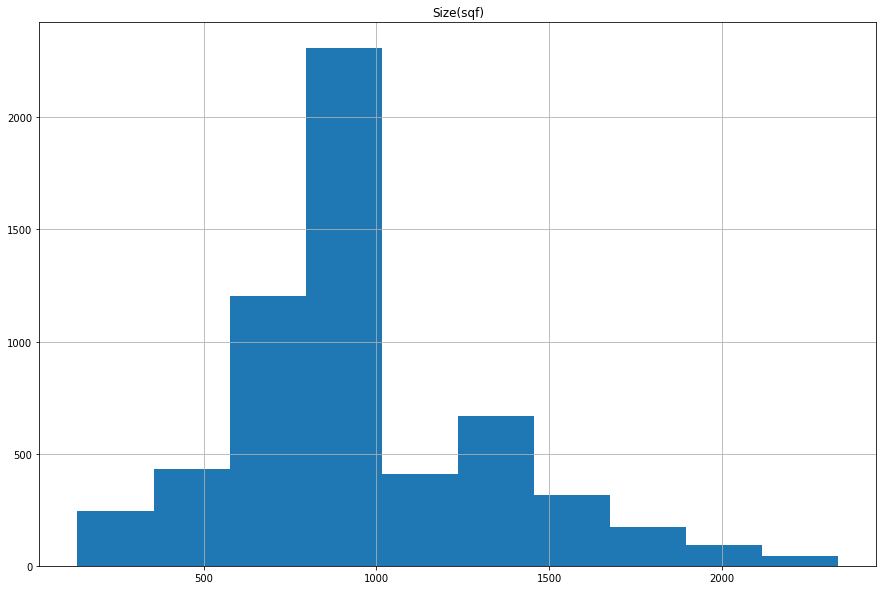

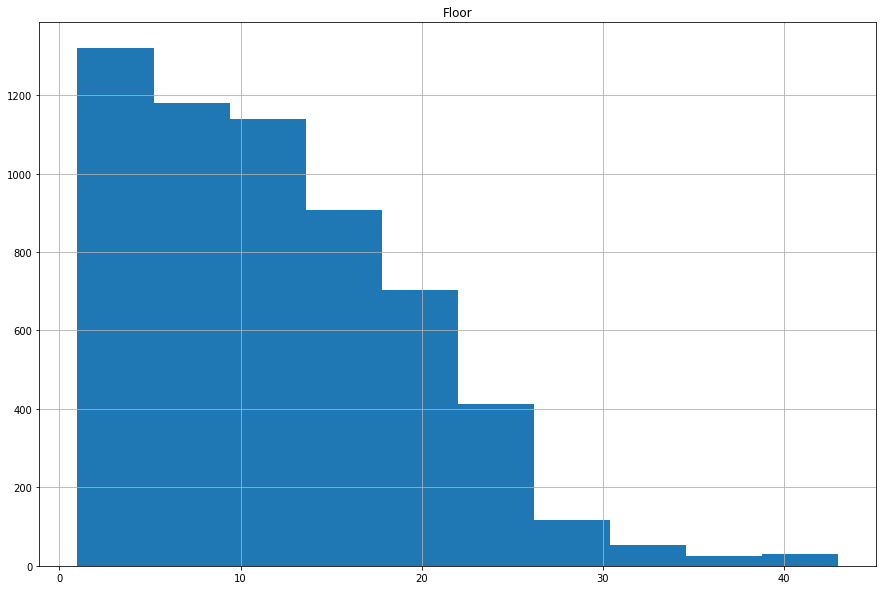

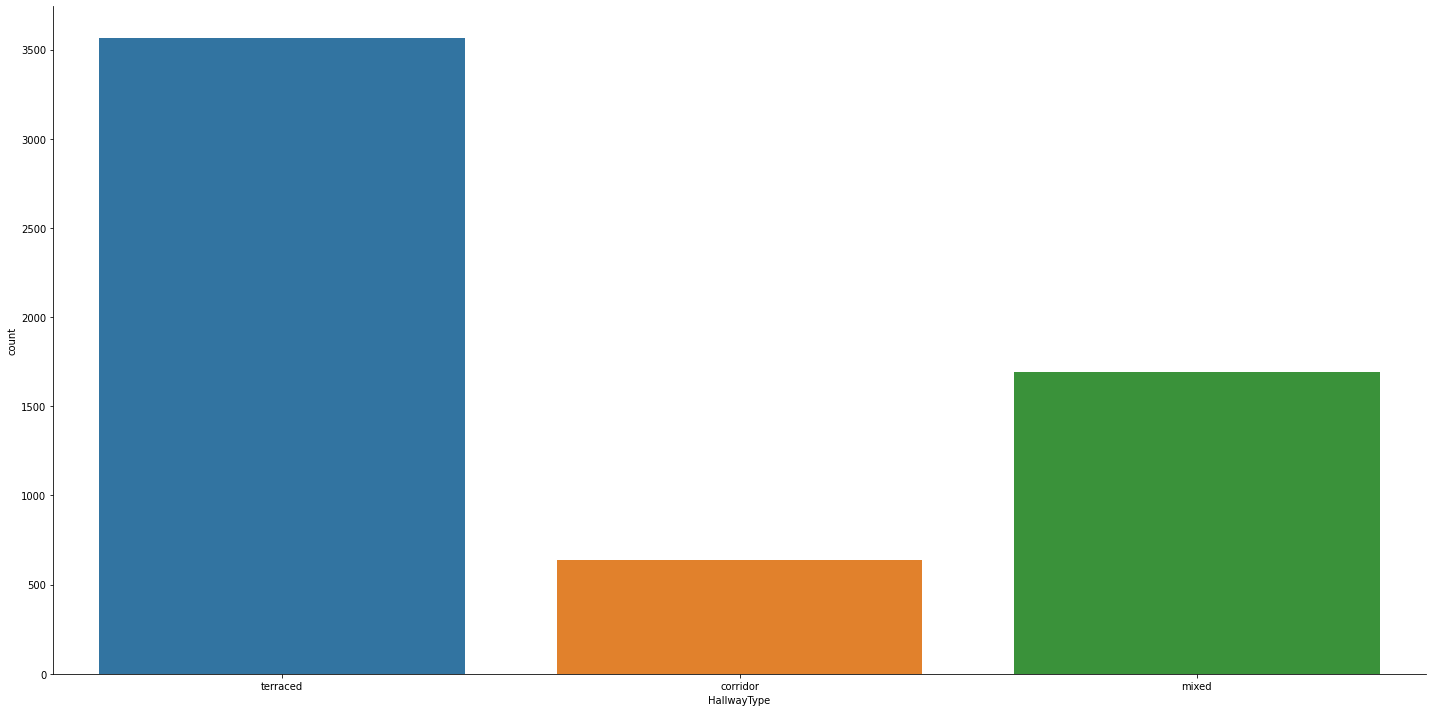

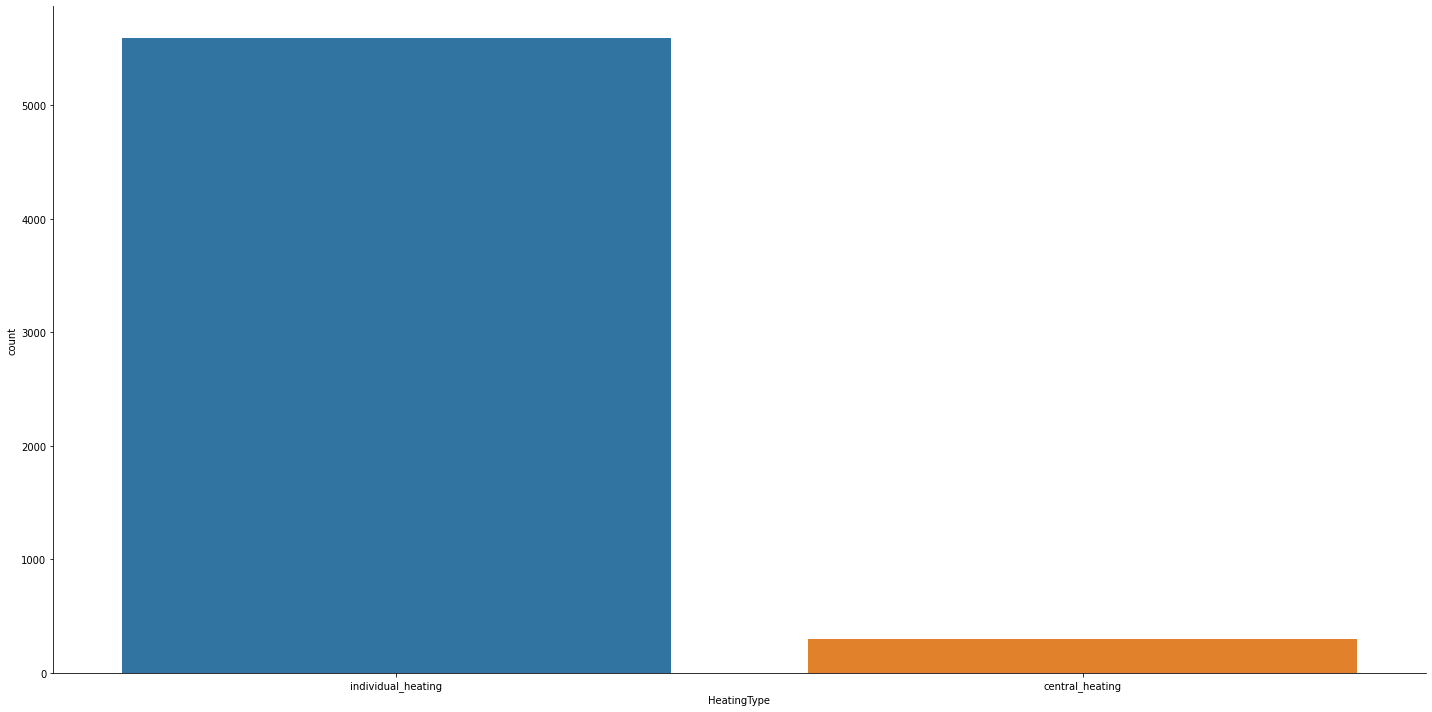

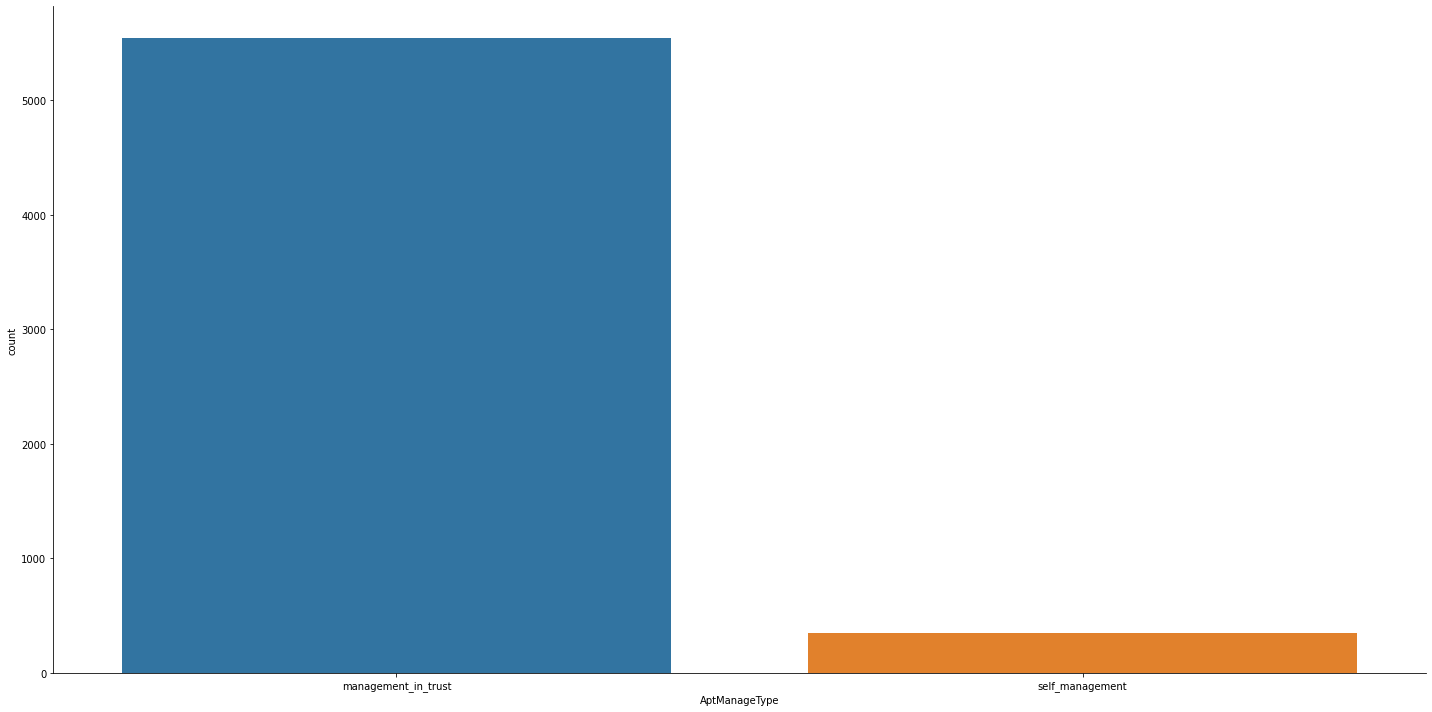

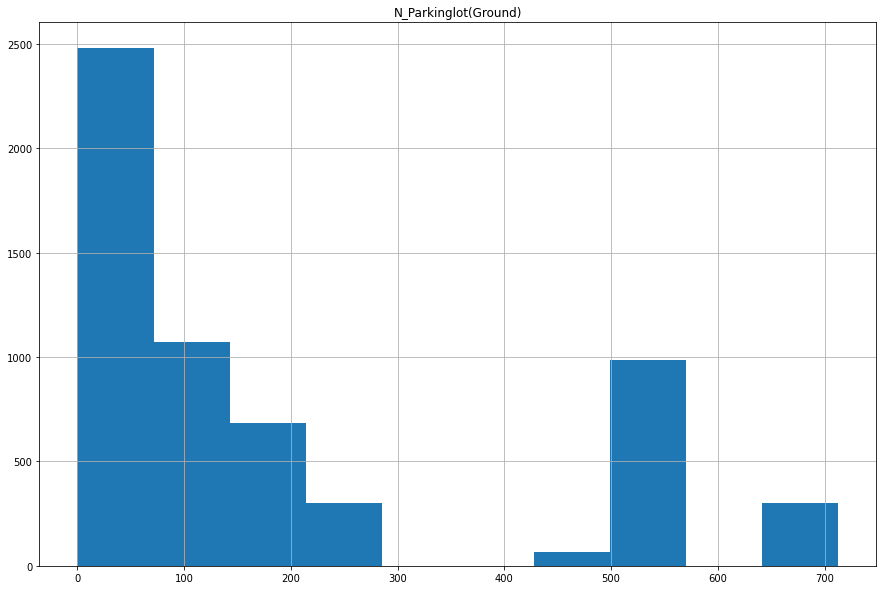

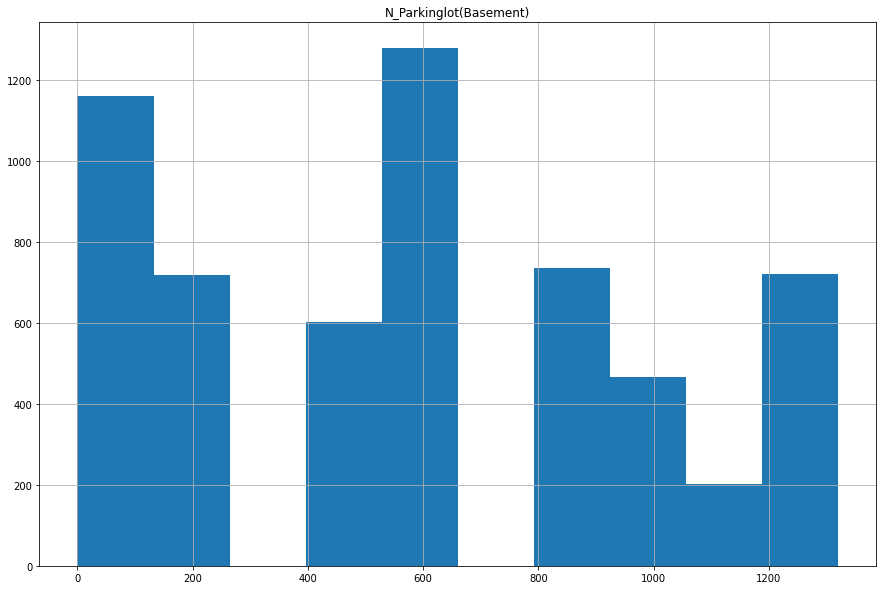

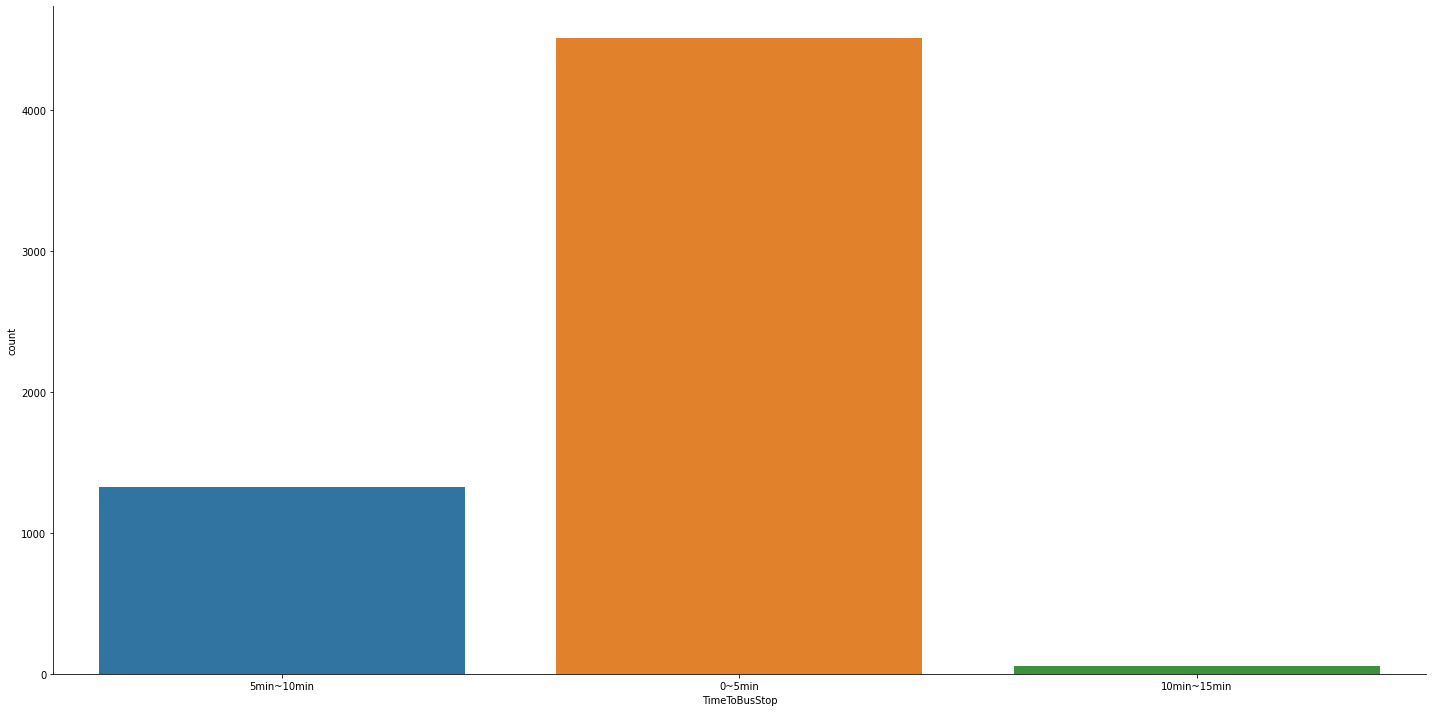

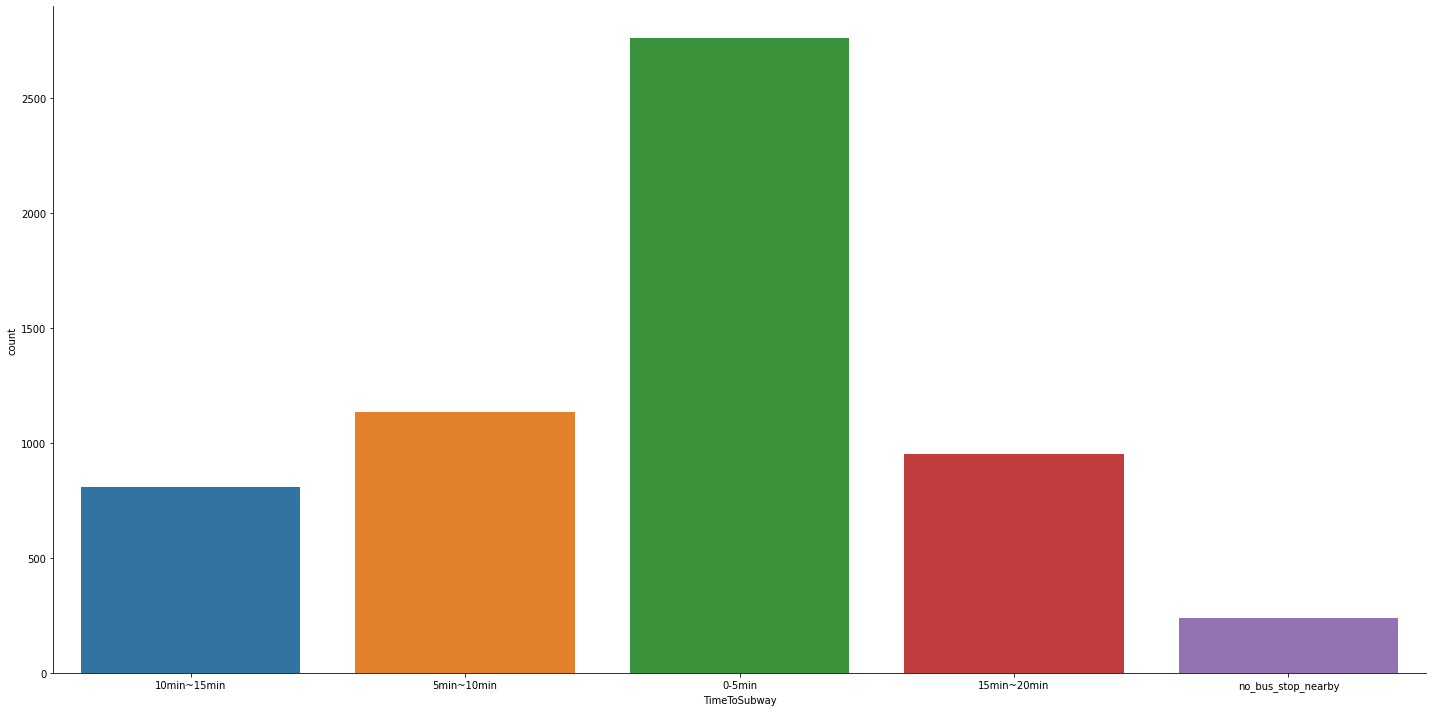

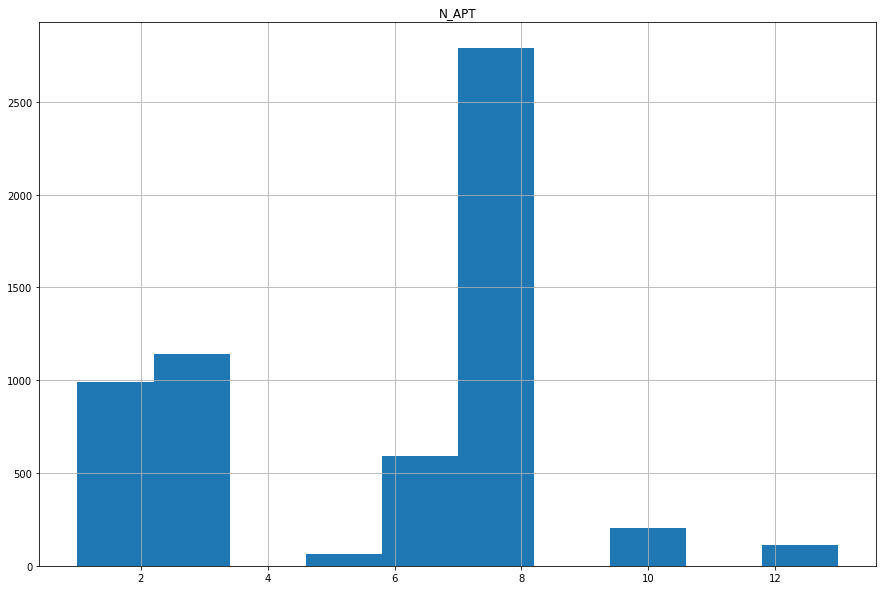

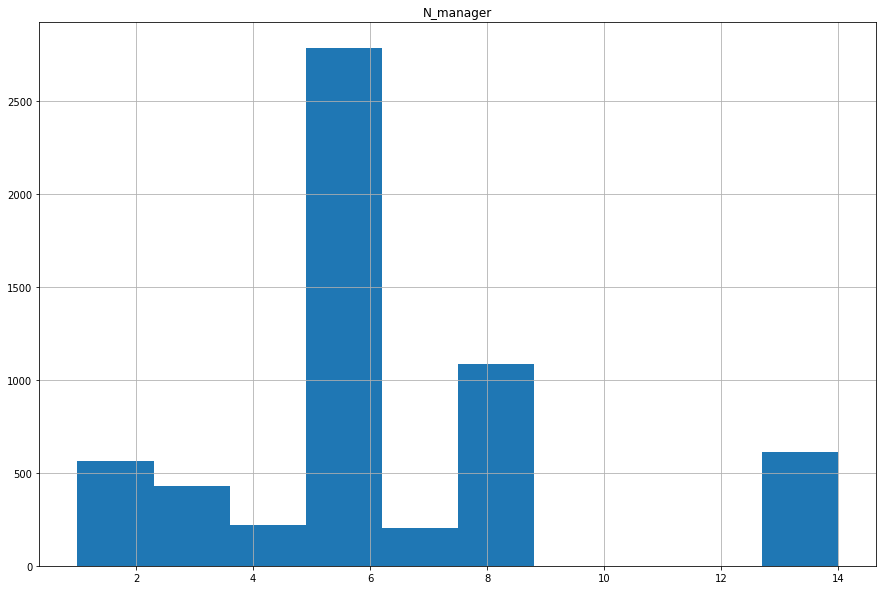

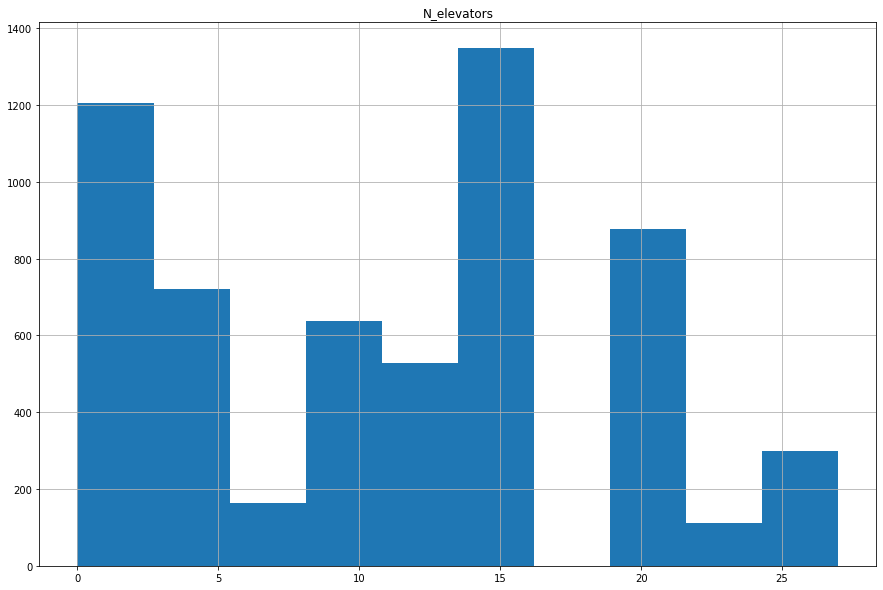

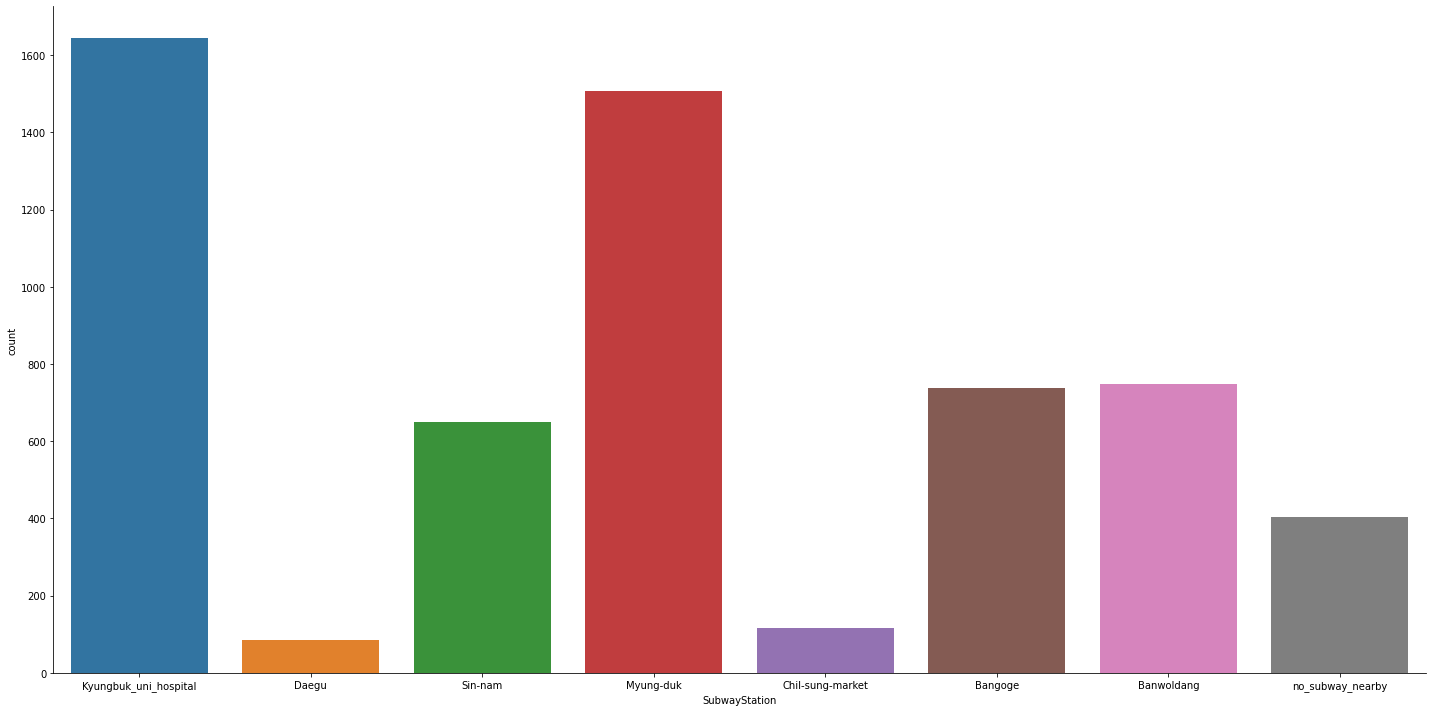

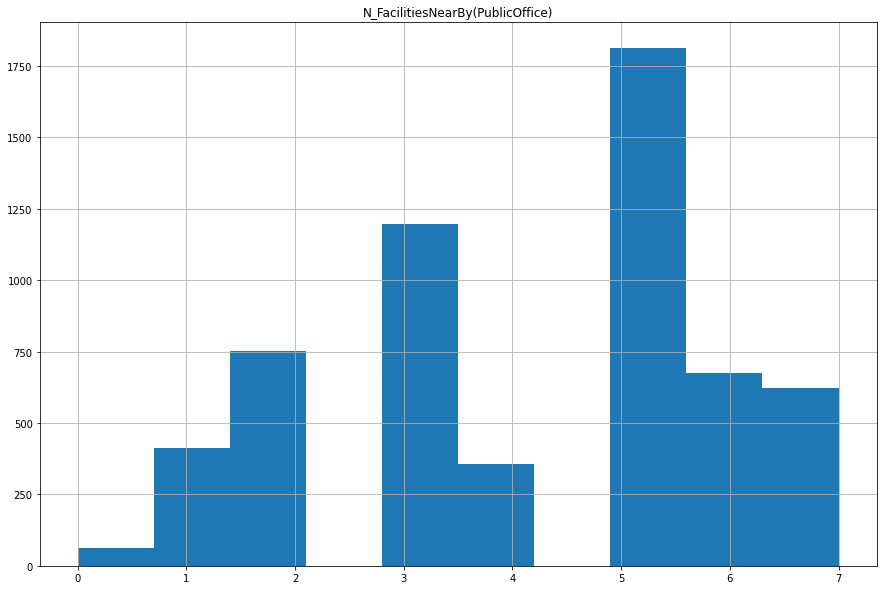

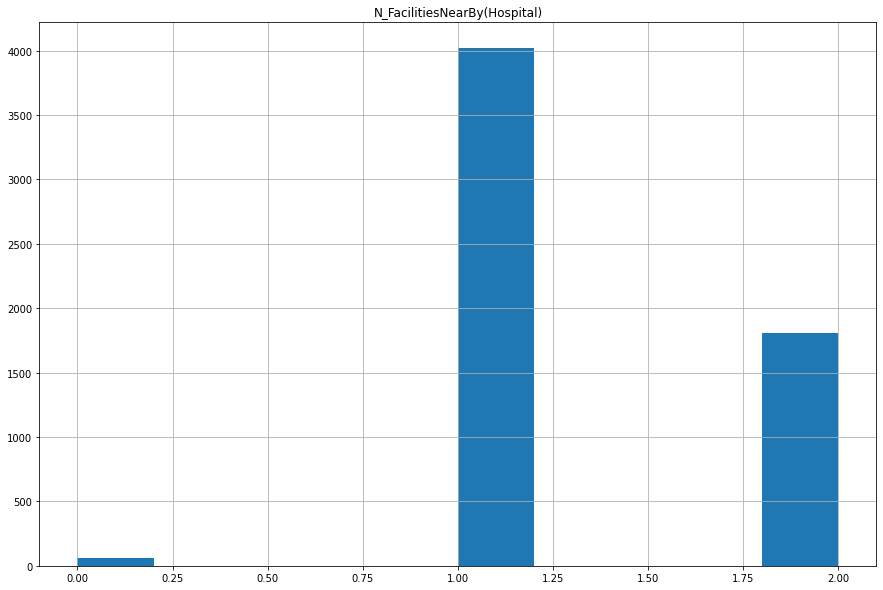

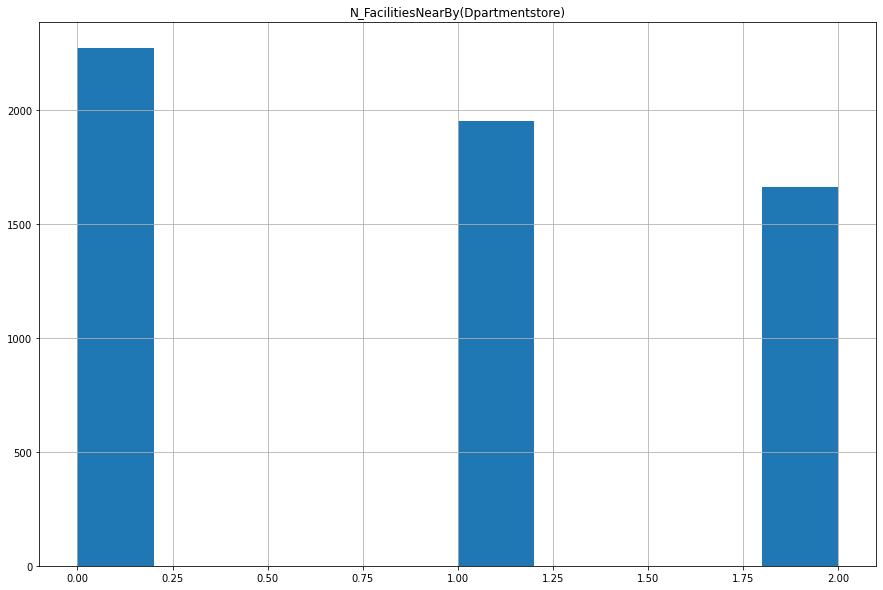

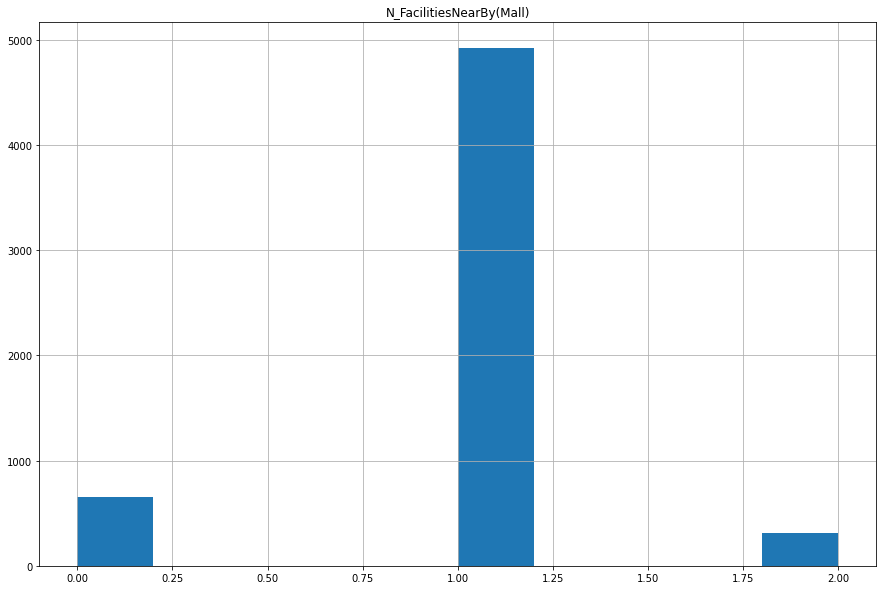

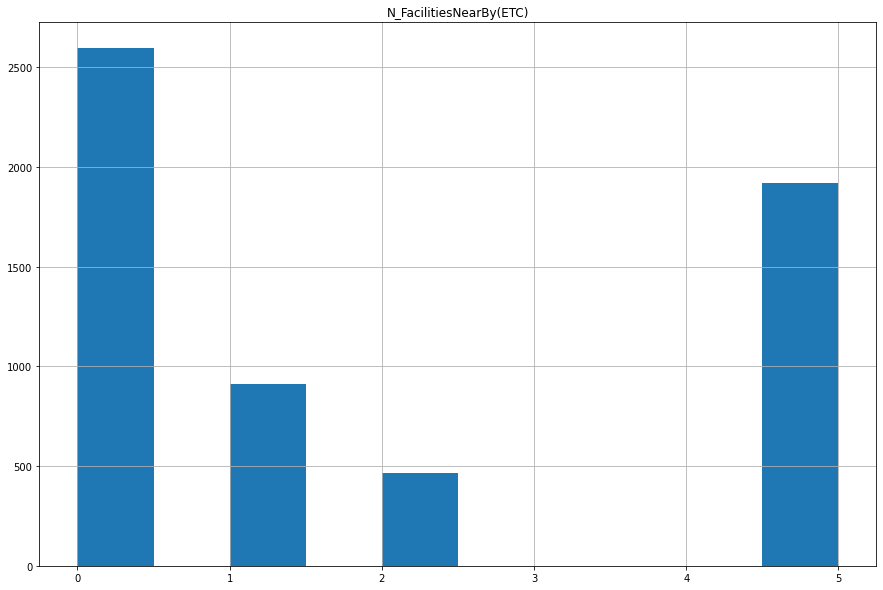

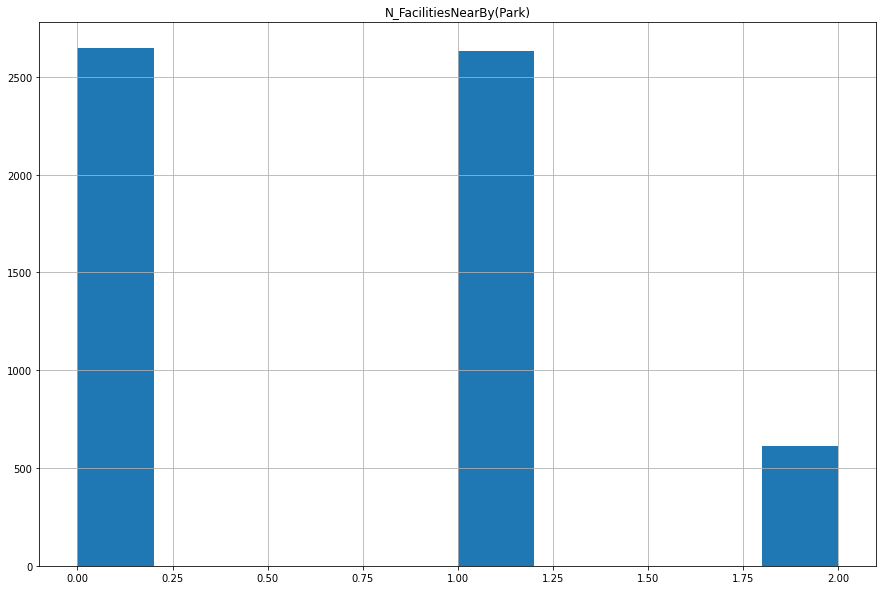

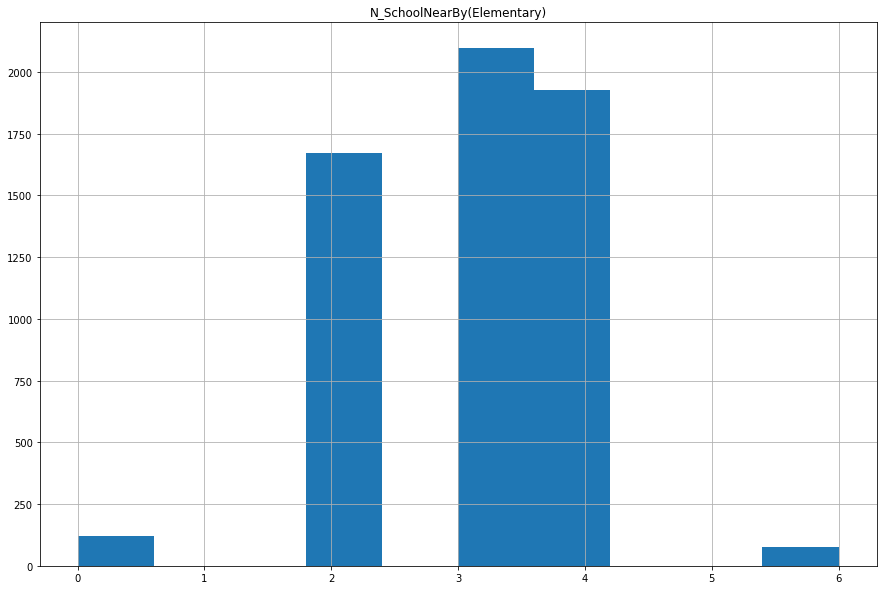

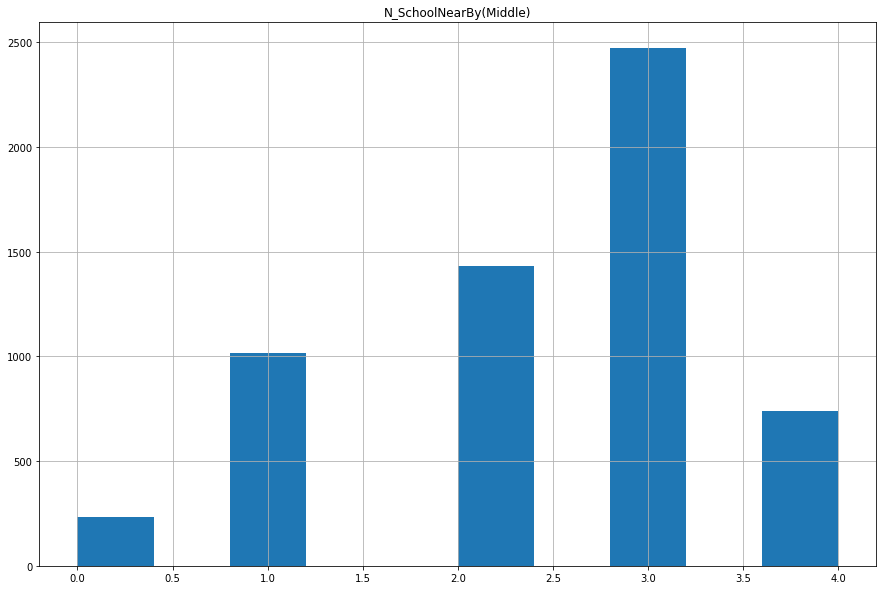

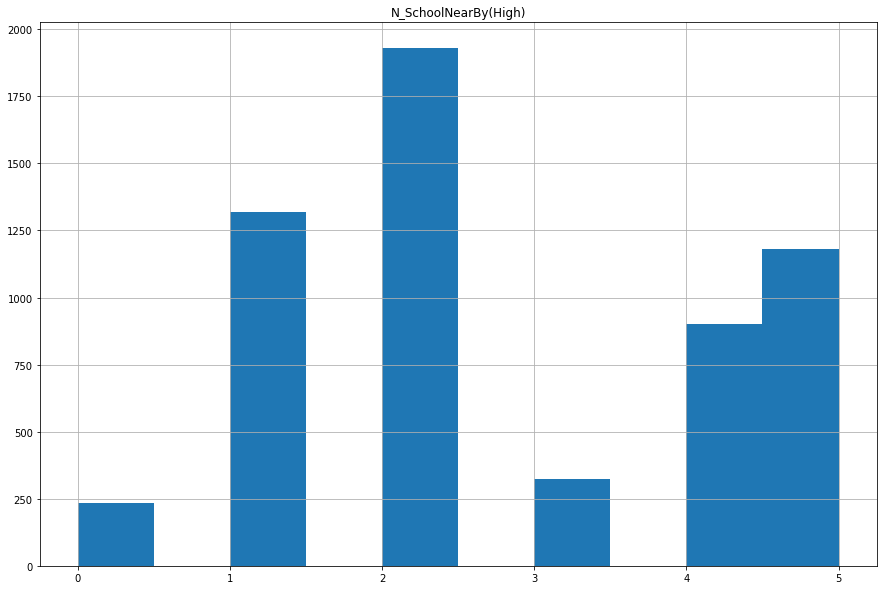

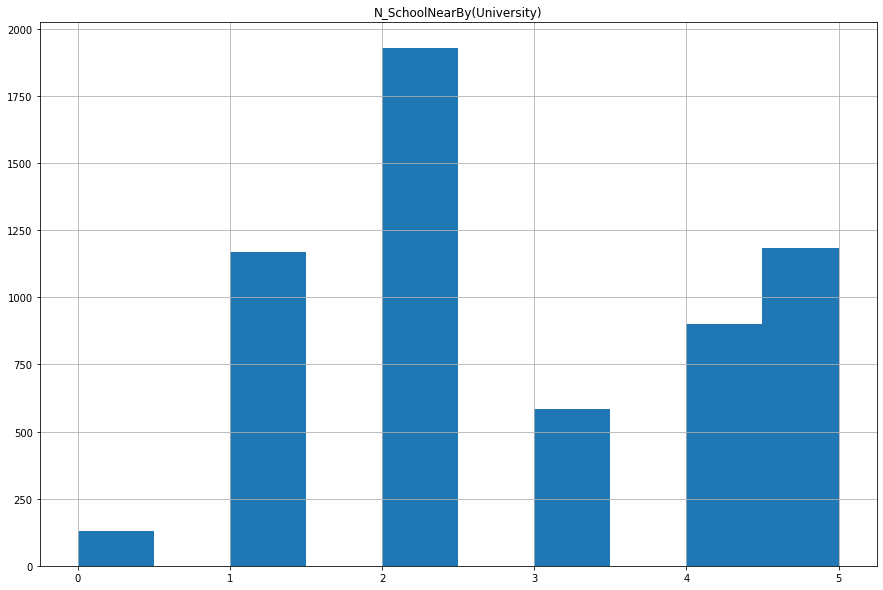

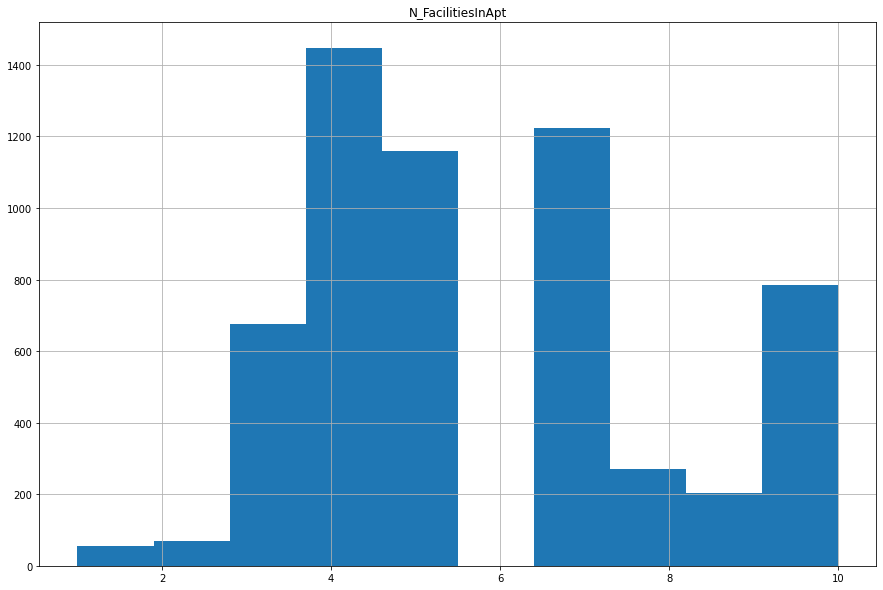

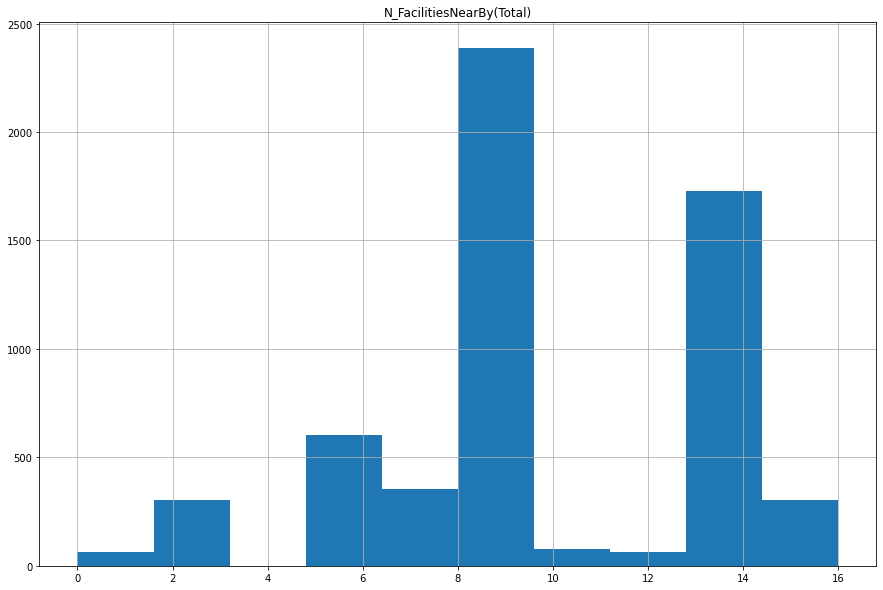

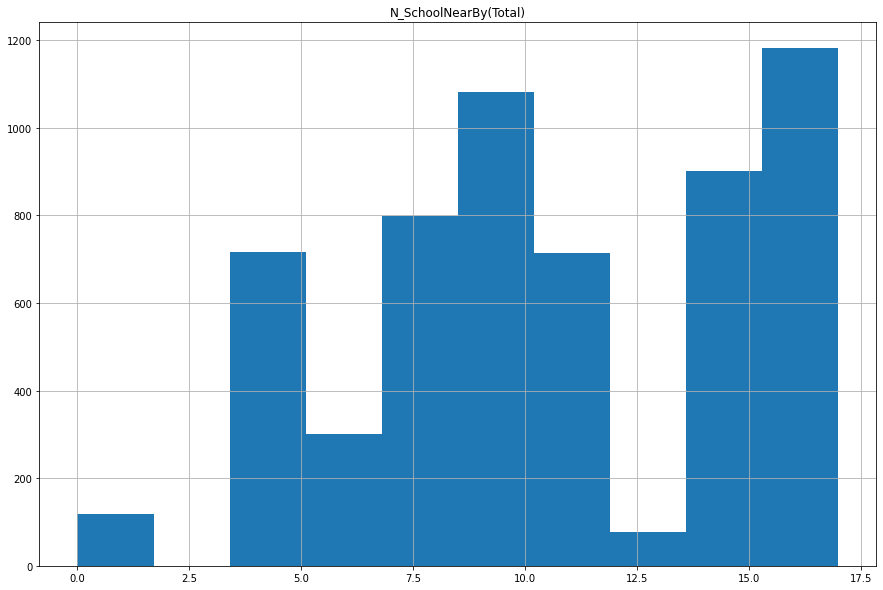

In [12]:
orgWithoutDupsFeatures = originalDataset.loc[:, originalDataset.columns]
categoricFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes == object].index)
numericFeaturesList = list(orgWithoutDupsFeatures.dtypes[orgWithoutDupsFeatures.dtypes != object].index)
for column in originalDataset.columns:
    if (originalDataset.dtypes[column].name.__eq__('object')):
        sb.catplot(x=column, kind='count', data=originalDataset, height=10, aspect=2)
    else:
        originalDataset.hist(column=column, figsize=[15,10])

In [13]:
dupsOut = originalDataset.drop_duplicates()
dupsOut.shape

(5575, 30)

<AxesSubplot:>

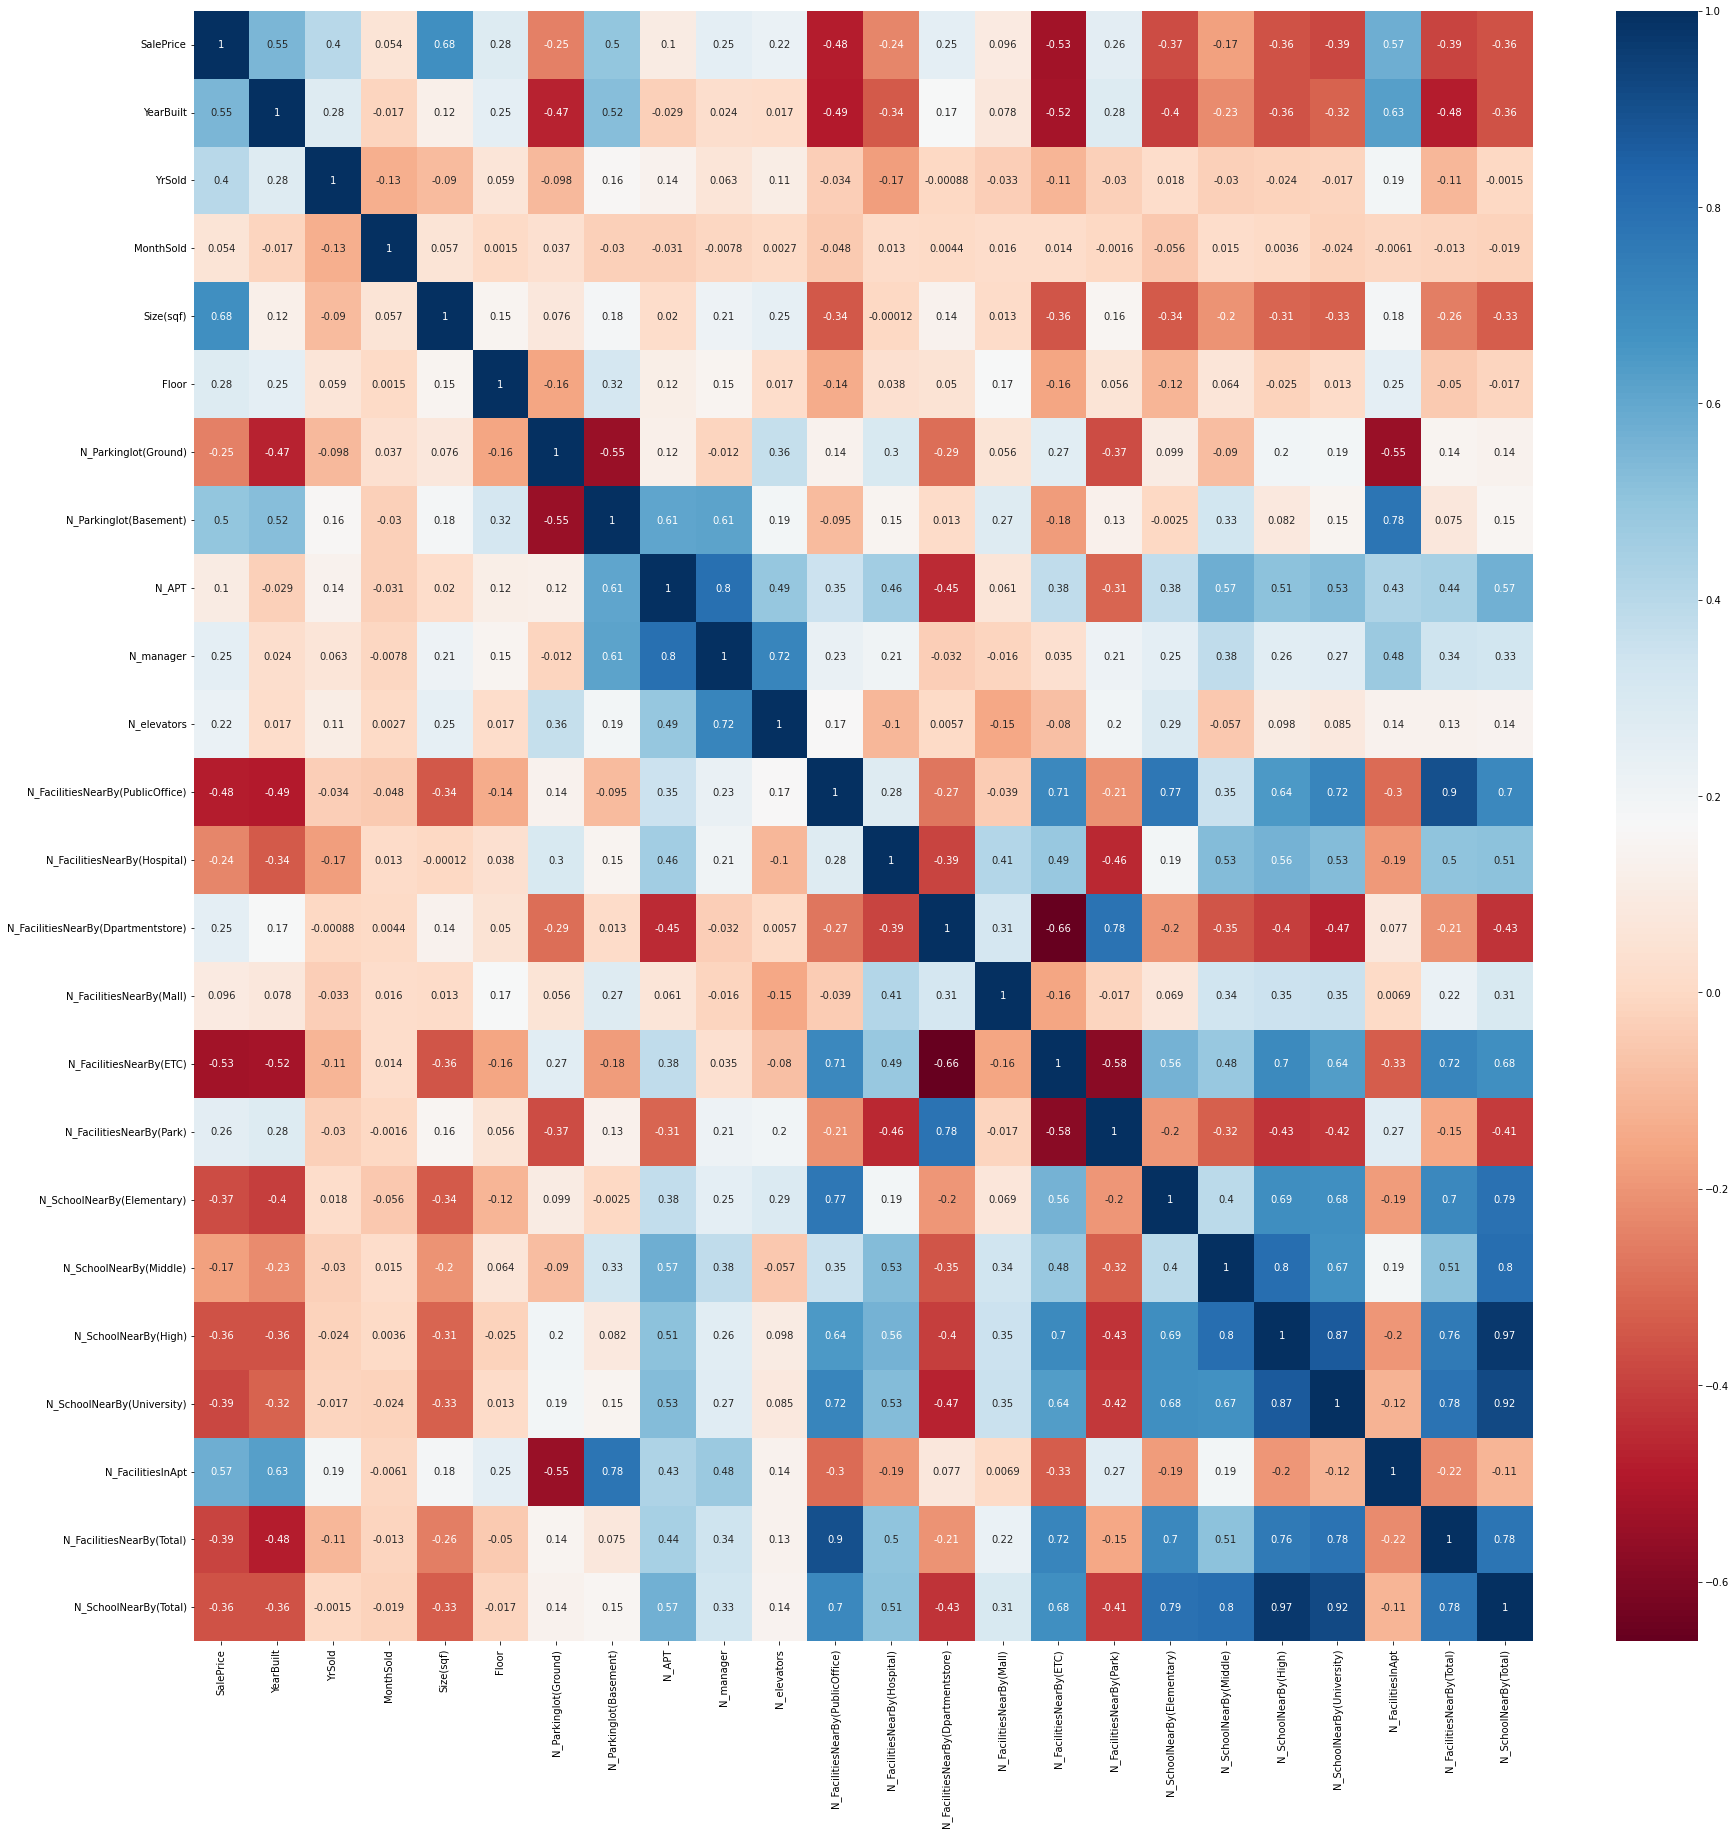

In [14]:
fig, ax = plt.subplots(figsize = (30,30))
sb.heatmap(dupsOut.corr(method='spearman'), annot=True, cmap='RdBu', ax=ax)

## Convert columns

In [18]:
convertedDataset = dupsOut.copy(deep=True)
convertedDataset['Size(m)'] = convertedDataset['Size(sqf)'] * 0.092903
convertedDataset.info()
convertedDataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5575 entries, 0 to 5890
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   SalePrice                           5575 non-null   int64  
 1   YearBuilt                           5575 non-null   int64  
 2   YrSold                              5575 non-null   int64  
 3   MonthSold                           5575 non-null   int64  
 4   Size(sqf)                           5575 non-null   int64  
 5   Floor                               5575 non-null   int64  
 6   HallwayType                         5575 non-null   object 
 7   HeatingType                         5575 non-null   object 
 8   AptManageType                       5575 non-null   object 
 9   N_Parkinglot(Ground)                5575 non-null   float64
 10  N_Parkinglot(Basement)              5575 non-null   float64
 11  TimeToBusStop                       5575 no

,SalePrice,YearBuilt,YrSold,MonthSold,Size(sqf),Floor,N_Parkinglot(Ground),N_Parkinglot(Basement),N_APT,N_manager,...,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(Park),N_SchoolNearBy(Elementary),N_SchoolNearBy(Middle),N_SchoolNearBy(High),N_SchoolNearBy(University),N_FacilitiesInApt,N_FacilitiesNearBy(Total),N_SchoolNearBy(Total),Size(m)
count,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,...,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000,5575.000000
mean,225612.302601,2002.599283,2012.679641,6.305291,969.755874,12.137220,203.328251,557.425471,5.552646,6.342601,...,1.951749,0.653094,3.000359,2.408251,2.663318,2.745471,5.761076,9.856502,10.817399,90.093230
std,106406.624672,8.857104,2.893016,3.357975,383.855591,7.626273,220.151685,413.009669,2.841978,3.249400,...,2.194933,0.667171,0.961960,1.038272,1.580347,1.515133,2.375563,3.509002,4.507819,35.661336
min,32743.000000,1978.000000,2007.000000,1.000000,135.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,12.541905
25%,147761.000000,1993.000000,2010.000000,3.000000,644.000000,6.000000,25.000000,184.000000,3.000000,5.000000,...,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,4.000000,8.000000,7.000000,59.829532
50%,212389.000000,2006.000000,2013.000000,6.000000,910.000000,11.000000,111.000000,536.000000,7.000000,6.000000,...,1.000000,1.000000,3.000000,3.000000,2.000000,2.000000,5.000000,9.000000,10.000000,84.541730
75%,295575.000000,2007.000000,2015.000000,9.000000,1160.000000,17.000000,249.000000,798.000000,8.000000,8.000000,...,5.000000,1.000000,4.000000,3.000000,4.000000,4.000000,7.000000,13.000000,15.000000,107.767480
max,585840.000000,2015.000000,2017.000000,12.000000,2337.000000,43.000000,713.000000,1321.000000,13.000000,14.000000,...,5.000000,2.000000,6.000000,4.000000,5.000000,5.000000,10.000000,16.000000,17.000000,217.114311
